In [396]:
import wfdb
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import pywt
import math
from scipy.signal import butter, lfilter
from scipy.fftpack import fft, ifft
from sklearn import preprocessing
import math
from sklearn.metrics import confusion_matrix
import itertools
from numpy.random import permutation

In [2]:
fileName=['a01','a02','a03','a04','a05','a06','a07','a08','a09','a10','a11','a12','a13','a14','a15','a16','a17','a18','a19','a20',
         'b01','b02','b03','b04','b05','c01','c02','c03','c04','c05','c06','c07','c08','c09','c10',
         'x01','x02','x03','x04','x05','x06','x07','x08','x09','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20']
mypath='C:/Users/sara/Documents/5anno/TESI/DataBase_PhysioNet/www.physionet.org/physiobank/database/apnea-ecg/'


In [404]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [344]:
def calcolaPSD(lista):
  #  print('calcolaPSD')
   # meanHRV=statistics.mean(RR_intervals)
   # for i in range(0,len(lista)-1):
       # lista[i]=lista[i]-meanHRV
    #print(meanHRV)
    l=len(lista)
    lista=lista.tolist()
    for i in range (0,65536-l):
        lista.append(.0)
   # print(len(lista))
    dft= fft(lista)
    freq = np.fft.fftfreq(len(lista))
    #plt.plot(freq,dft)
    PSD = np.abs(dft) ** 2
   # PSD=scipy.signal.periodogram(FFT)
    #magnitude=PSD[0]
   # print(len(PSD),'h')
    PSD64=[]
    for i in range (0,64):
        PSD64.append(statistics.mean(PSD[1024*i:1024*(i+1)]))

    return PSD64

In [171]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

In [172]:
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [3]:
def wrcoef(X, coef_type, coeffs, wavename, level):
    N = np.array(X).size
    a, ds = coeffs[0], list(reversed(coeffs[1:]))

    if coef_type =='a':
        return pywt.upcoef('a', a, wavename, level=level,take=N)[:N]
    elif coef_type == 'd':
        return pywt.upcoef('d', ds[level-1], wavename, level=level,take=N)[:N]
    else:
        raise ValueError("Invalid coefficient type: {}".format(coef_type))

In [633]:
index=21
recordname=mypath+fileName[index]
ann = wfdb.rdann(recordname, extension="apn")
time_apn=ann.sample/100
apn=ann.symbol

df = pd.read_pickle(mypath+'RR-EDR/'+fileName[index]+'EDR.pkl')

In [634]:
time_edr=df['time']
edr=df['edr']

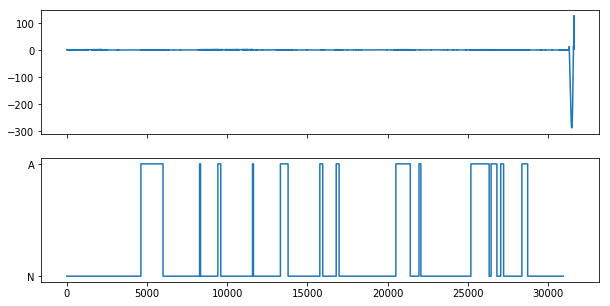

In [635]:
f, axarr = plt.subplots(2, sharex=True,figsize=(10,5))
axarr[0].plot(time_edr,edr)
axarr[1].step(time_apn,apn)


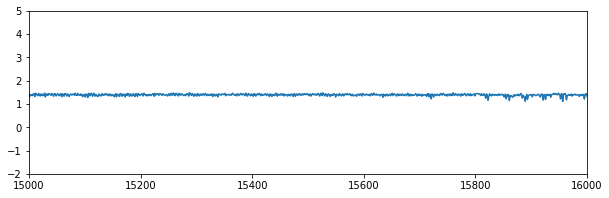

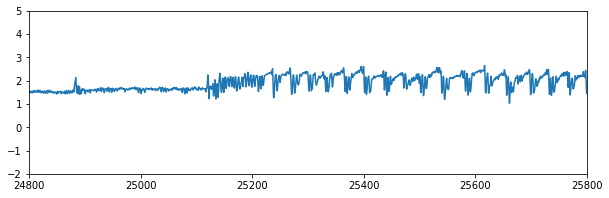

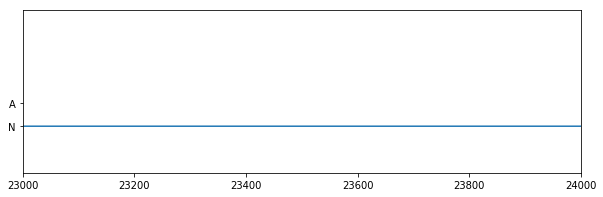

In [636]:
plt.figure(figsize=(10,3))
plt.axis([15000,16000,-2,5])
plt.plot(time_edr,edr)
plt.figure(figsize=(10,3))
plt.axis([24800,25800,-2,5])
plt.plot(time_edr,edr)
plt.figure(figsize=(10,3))
plt.axis([23000,24000,-2,5])
plt.step(time_apn,apn)


In [637]:
time_edr[15000*2]

15000.470091514011

In [638]:
statistics.variance(edr[1000*2:16000*2])

0.2513666226240773

In [639]:
statistics.variance(edr[5000*2:6000*2])

0.07707079676466629

In [640]:
wavelet = pywt.Wavelet('db4')
from pywt import wavedec
data=edr
coeffs = wavedec(data, 'db4', level=9)
level = 9
A9 = wrcoef(data, 'a', coeffs, 'db4', level)
D9 = wrcoef(data, 'd', coeffs, 'db4', level)
D8 = wrcoef(data, 'd', coeffs, 'db4', 8)
D7 = wrcoef(data, 'd', coeffs, 'db4', 7)
D6 = wrcoef(data, 'd', coeffs, 'db4', 6)
D5 = wrcoef(data, 'd', coeffs, 'db4', 5)
D4 = wrcoef(data, 'd', coeffs, 'db4', 4)
D3 = wrcoef(data, 'd', coeffs, 'db4', 3)
D2 = wrcoef(data, 'd', coeffs, 'db4', 2)
D1 = wrcoef(data, 'd', coeffs, 'db4', 1)

Text(0,0.5,'D9')

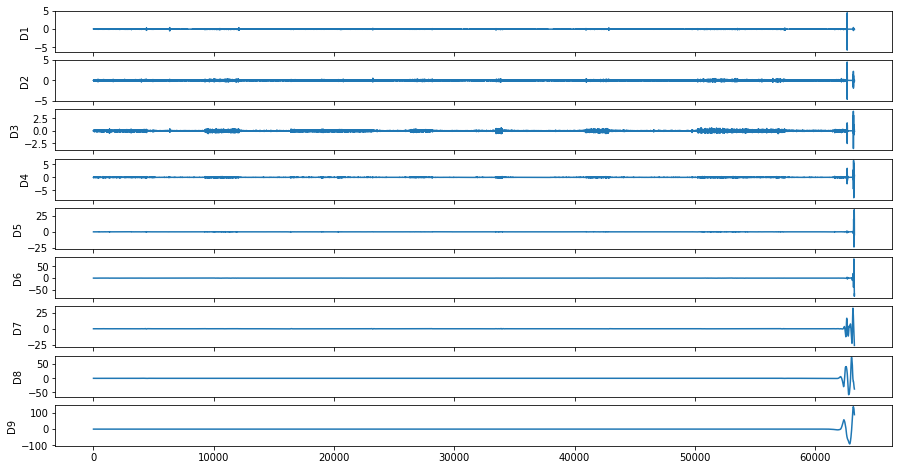

In [641]:
f, axarr = plt.subplots(9, sharex=True,figsize=(15,8))
#axarr[0].axis([17000*2,20000*2,-3,3])
axarr[0].plot(D1)
axarr[0].set_ylabel('D1')
axarr[1].plot(D2)
axarr[1].set_ylabel('D2')
axarr[2].plot(D3)
axarr[2].set_ylabel('D3')
axarr[3].plot(D4)
axarr[3].set_ylabel('D4')
axarr[4].plot(D5)
axarr[4].set_ylabel('D5')
axarr[5].plot(D6)
axarr[5].set_ylabel('D6')
axarr[6].plot(D7)
axarr[6].set_ylabel('D7')
axarr[7].plot(D8)
axarr[7].set_ylabel('D8')
axarr[8].plot(D9)
axarr[8].set_ylabel('D9')

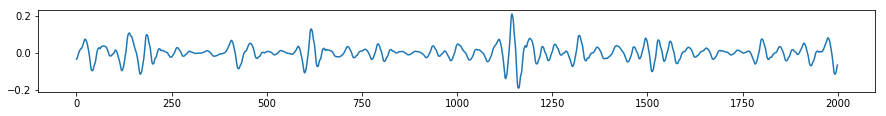

In [642]:
plt.figure(figsize=(15,1.5))
plt.plot(D5[1000*2:2000*2])

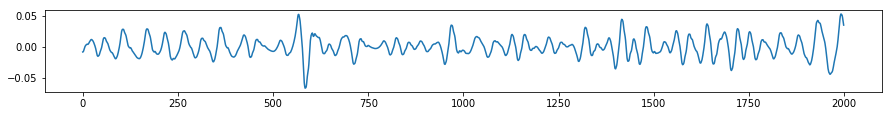

In [643]:
plt.figure(figsize=(15,1.5))
plt.plot(D5[23000*2:24000*2])

In [644]:
statistics.variance(D5[1000*2:2000*2])

0.0016496335106030305

In [645]:
statistics.variance(D5[23000*2:24000*2])

0.00025035032170831633

# Feature Extraction PSD

In [646]:
dfEDR = pd.read_pickle( mypath+'RR-EDR/'+fileName[index]+'EDR.pkl')
dfEDR=dfEDR.dropna()
#RR_intervals=dfQRS['rr']
df = pd.read_pickle( mypath+'DivisioneDB/'+fileName[index]+'divisione.pkl')

In [647]:
WAV=np.zeros((len(df),8))
df_features=pd.DataFrame()
df_WAV=pd.DataFrame()
for i in range (0,len(df)):
    var=[]
    #print(i)
    #data=edr[i*120:(i+1)*120]
    #PSD64=calcolaPSD(data)
    #PSD32=PSD64[0:33]
    #ffts.append(PSD32)
    var.append(statistics.variance(D1[i*120:(i+1)*120]))
    var.append(statistics.variance(D2[i*120:(i+1)*120]))
    var.append(statistics.variance(D3[i*120:(i+1)*120]))
    var.append(statistics.variance(D4[i*120:(i+1)*120]))
    var.append(statistics.variance(D5[i*120:(i+1)*120]))
    var.append(statistics.variance(D6[i*120:(i+1)*120]))
    var.append(statistics.variance(D7[i*120:(i+1)*120]))
    var.append(statistics.variance(D8[i*120:(i+1)*120]))
    for k in range (0,8):
        WAV[i][k]=var[k]
df_WAV=pd.DataFrame(WAV)
   # df_features = pd.concat([df_features, df_PSD], axis=1, sort=False)

In [648]:
label=[]
for i in range(0,len(df['label'])):
        if(df['label'][i]=='A'):
            label.append(1)
        else:
            label.append(0)
df_WAV['label']=label
df_tot=df_WAV

In [649]:
'''PSD=np.zeros((len(df),32))
df_features=pd.DataFrame()
ffts=[]
for i in range (0,len(df)):
    #print(i)
    data=edr[i*120:(i+1)*120]
    PSD64=calcolaPSD(data)
    PSD32=PSD64[0:33]
    #ffts.append(PSD32)
    for k in range (0,32):
        PSD[i][k]=PSD32[k]
df_PSD=pd.DataFrame(PSD)
   # df_features = pd.concat([df_features, df_PSD], axis=1, sort=False)'''

'PSD=np.zeros((len(df),32))\ndf_features=pd.DataFrame()\nffts=[]\nfor i in range (0,len(df)):\n    #print(i)\n    data=edr[i*120:(i+1)*120]\n    PSD64=calcolaPSD(data)\n    PSD32=PSD64[0:33]\n    #ffts.append(PSD32)\n    for k in range (0,32):\n        PSD[i][k]=PSD32[k]\ndf_PSD=pd.DataFrame(PSD)\n   # df_features = pd.concat([df_features, df_PSD], axis=1, sort=False)'

In [650]:
'''label=[]
for i in range(0,len(df['label'])):
        if(df['label'][i]=='A'):
            label.append(1)
        else:
            label.append(0)
df_PSD['label']=label
df_tot=df_PSD'''

"label=[]\nfor i in range(0,len(df['label'])):\n        if(df['label'][i]=='A'):\n            label.append(1)\n        else:\n            label.append(0)\ndf_PSD['label']=label\ndf_tot=df_PSD"

# classificazione


In [651]:
# Randomly shuffle the index of nba.
random_indices = permutation(df_tot.index)
# Set a cutoff for how many items we want in the test set (in this case 1/3 of the items)
test_cutoff = math.floor(len(df_tot)*0.3)
# Generate the test set by taking the first 1/3 of the randomly shuffled indices.
test = df_tot.loc[random_indices[1:test_cutoff]]
# Generate the train set with YYYYYthe rest of the data.
train = df_tot.loc[random_indices[test_cutoff:]]

#train,test= train_test_split(df_a, test_size=0.3, random_state=42)

In [652]:
df_tot.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 'label'], dtype='object')

In [653]:
x_columns = [ 0,       1,       2,       3,       4,       5,
             6,       7]
y_column = ['label']

In [654]:
from sklearn.neighbors import KNeighborsRegressor
# Create the knn model.
# Look at the five closest neighbors.
knn = KNeighborsRegressor(n_neighbors=1)
# Fit the model on the training data.
classifier=knn.fit(train[x_columns], train[y_column])
# Make point predictions on the test set using the fit model.
predictions = knn.predict(test[x_columns])

y_pred = classifier.fit(train[x_columns], train[y_column]).predict(test[x_columns])
for i in range(0,len(y_pred)):
    y_pred[i]=math.floor(y_pred[i])

In [655]:
cnf_matrix = confusion_matrix(test[y_column]['label'], y_pred)

Confusion matrix, without normalization
[[113  11]
 [  8  22]]


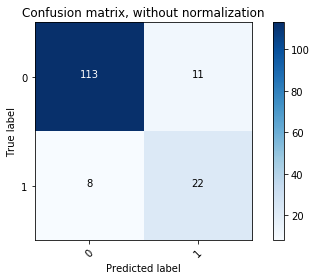

In [656]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[0.91129032 0.08870968]
 [0.26666667 0.73333333]]


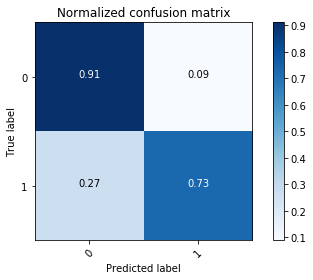

In [657]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'], normalize=True,
                      title='Normalized confusion matrix')